In [1]:
import scvelo as scv
scv.settings.verbosity = 0
import unitvelo as utv

(Running UniTVelo 0.2.5)
2024-06-01 04:28:32


2024-06-01 12:28:33.336117: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 12:28:33.336201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 12:28:33.337682: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
adata = scv.read('./data/BoneMarrow/human_cd34_bone_marrow/temp_1.h5ad')

In [10]:
adata

AnnData object with n_obs × n_vars = 5780 × 2000
    obs: 'clusters', 'palantir_pseudotime', 'assigned_t', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'dpt_pseudotime', 'latent_time', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_inter', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_sr2', 'fit_ur2'
    uns: 'basis', 'clusters_colors', 'datapath', 'diffmap_evals', 'iroot', 'label', 'log1p', 'neighbors', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_diffmap', 'X_pca', 'X_tsne', 'velocity_tsne'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'Mu_scale', 'Pred_s', 'Pred_u', 'fit_t', 'spliced', 'unspliced', 'velocity'
    obsp: 'connectivities', 'distances'

In [2]:
adata = scv.datasets.bonemarrow()
adata

AnnData object with n_obs × n_vars = 5780 × 14319
    obs: 'clusters', 'palantir_pseudotime', 'assigned_t'
    uns: 'clusters_colors'
    obsm: 'X_tsne'
    layers: 'spliced', 'unspliced'

In [3]:
# dataset = '../data/BoneHuman/adata.h5ad'
dataset = './data/BoneMarrow/human_cd34_bone_marrow.h5ad'
label = 'clusters'
exp_metrics = {}

Parameter `cluster_edges` is for algorithm evaluation purpose given expert annotated ground truth. It contains a list of tuples in which stores the source cluster and target cluster of cells.

In [4]:
cluster_edges = [
    ("HSC_1", "Ery_1"), 
    ("HSC_1", "HSC_2"), 
    ("Ery_1", "Ery_2")]

In [5]:
velo_config = utv.config.Configuration()

In [6]:
velo_config.VGENES = 'offset'
velo_config.R2_ADJUST = False
velo_config.IROOT = 'HSC_1'
velo_config.FIT_OPTION = '1'
velo_config.GPU = 5

------> Manully Specified Parameters <------
R2_ADJUST:	False
VGENES:	offset
IROOT:	HSC_1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
--------------------------------------------



/ssd/users/mingzegao/.conda/envs/unitvelo_atac/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 2000 highly variable genes.
Computing moments for 2000 genes with n_neighbors: 30 and n_pcs: 30
# of velocity genes 1382 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 1203 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 1201 (Criterion: genes have reads in more than 5% of total cells)
Using GPU card: 5
name: CCNL2, gamma: -0.009563378989696503
name: SNIP1, gamma: -0.05730361491441727
name: MYSM1, gamma: -0.024125348776578903
name: CTBS, gamma: -0.04764629900455475
name: DNTTIP2, gamma: -0.007253925781697035
name: TAF13, gamma: -0.00847581122070551
name: ST7L, gamma: -0.06658656895160675
name: DCAF8, gamma: -1.1805761914729374e-06
name: TOR1AIP2, gamma: -0.003942648880183697
name: GPATCH2, gamma: -0.18819990754127502
name: DHDDS, gamma: -0.06034638732671738
name: STX12, gamma: -0.0034813168458640575
name: TMEM69, gamma: -0.0037228360306471586
name: TCEANC2, gamma: -0.04899514093995094


Loss (Total): 4508.130, (Spliced): 2284.102, (Unspliced): 2224.029: 100%|█████████▉| 11999/12000 [33:15<00:00,  6.01it/s]  


  0%|          | 0/5780 [00:00<?, ?cells/s]

/ssd/users/mingzegao/.conda/envs/unitvelo_atac/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/ssd/users/mingzegao/.conda/envs/unitvelo_atac/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


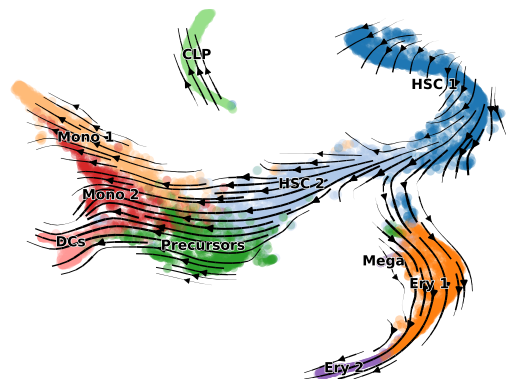

In [7]:
adata = utv.run_model('./data/BoneMarrow/human_cd34_bone_marrow.h5ad', label, config_file=velo_config)
adata.uns['clusters_colors'] = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')

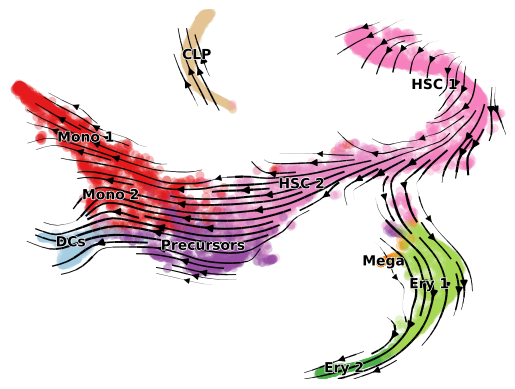

In [5]:
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')

/ssd/users/mingzegao/.conda/envs/unitvelo_atac/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


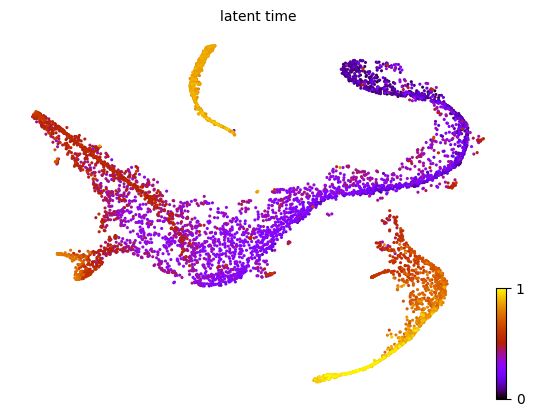

In [8]:
scv.tl.latent_time(adata, min_likelihood=None)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=20)

In [9]:
subvar = adata.var.loc[adata.var['velocity_genes'] == True]
sub = adata[:, subvar.index]

Text(0.5, 1.0, 'Peak Time')

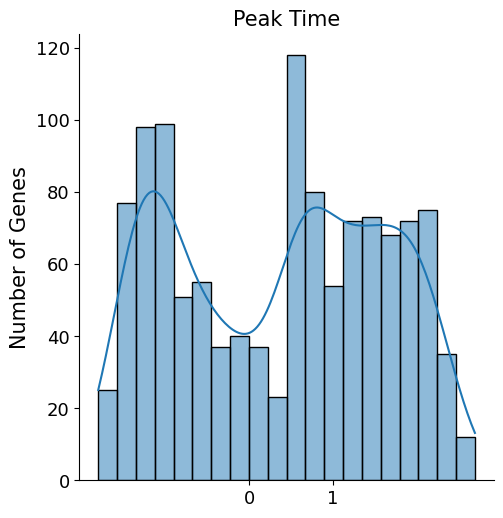

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(sub.var['fit_t'].values, kde=True, bins=20)
plt.xticks([0, 1], fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Number of Genes', fontsize=15)
plt.title('Peak Time', fontsize=15)

Here shows an example of repression gene, `CD44`. Generally the spliced counts follow a decreased manner (from upper right to lower left of the black pahse portrait), though an elevated expression can be observed in unspliced counts.

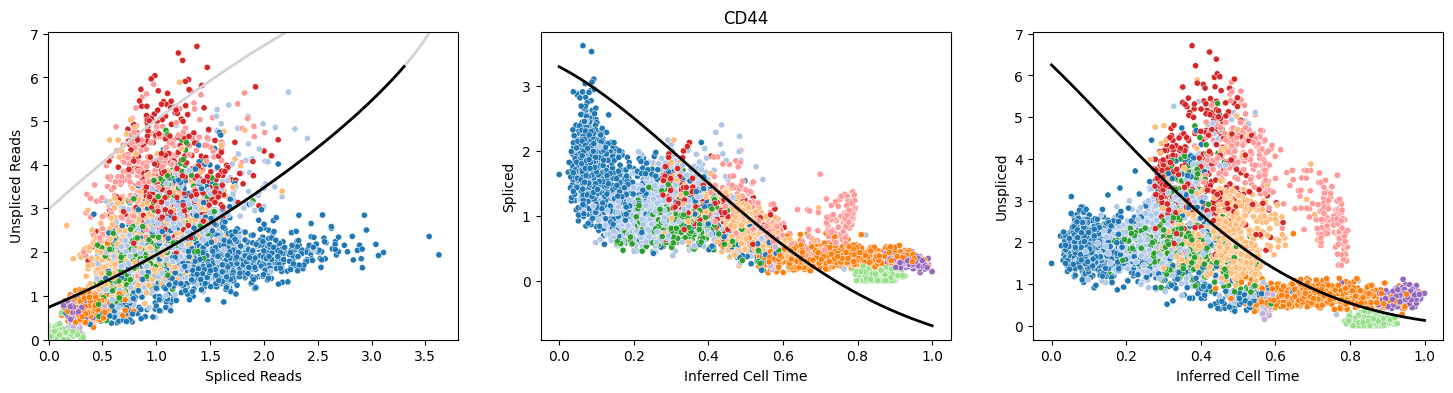

In [12]:
utv.pl.plot_range('CD44', adata, velo_config, 
    show_legend=False)

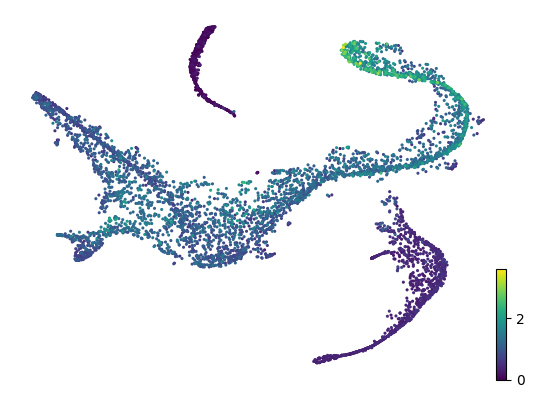

In [11]:
import numpy as np
gene_name = 'CD44'
adata.obs['temp'] = np.array(adata[:, gene_name].layers['Ms'].squeeze())
scv.pl.scatter(adata, color='temp', color_map='viridis', size=20, title='')

/ssd/users/mingzegao/.conda/envs/unitvelo_atac/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


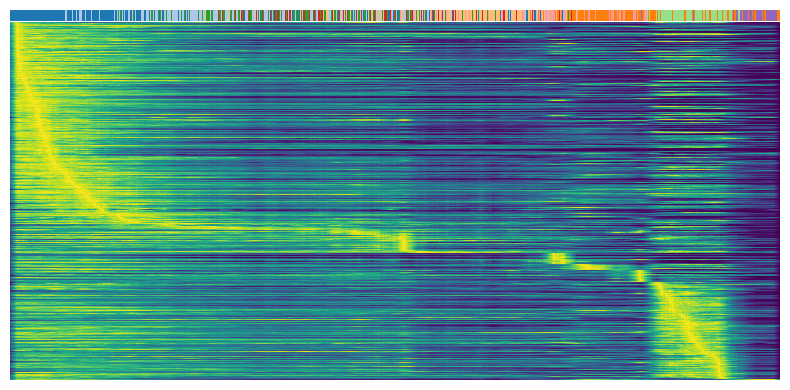

In [13]:
adata.uns['clusters_colors'] = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
gene = sub.var.loc[sub.var['fit_t'] < 0.05].index # repression
scv.pl.heatmap(
    adata, var_names=gene, sortby='latent_time', yticklabels=False,
    col_color=label, n_convolve=100)

/ssd/users/mingzegao/.conda/envs/unitvelo_atac/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


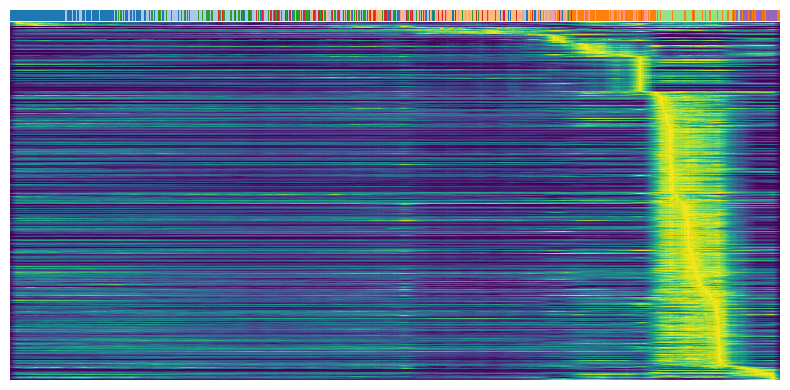

In [14]:
gene = sub.var.loc[sub.var['fit_t'] > 0.95].index # induction
scv.pl.heatmap(
    adata, var_names=gene, sortby='latent_time', yticklabels=False,
    col_color=label, n_convolve=100)